In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
print("Imported !!")

Imported !!


In [2]:
# df = pd.read_csv('population_final.csv')
df = pd.read_csv('population_pyrmid.csv')

In [3]:
df.head(2)

,Age Range,Year,Male,Female
0,00 to 04,1960,1866014,1839923
1,NaN,1961,1937273,1908283


In [4]:
df['Age Range'] = df['Age Range'].fillna(method='ffill')

In [5]:
df['Year'].max()

2021

In [6]:
df.head()

,Age Range,Year,Male,Female
0,00 to 04,1960,1866014,1839923
1,00 to 04,1961,1937273,1908283
2,00 to 04,1962,2018504,1986198
3,00 to 04,1963,2100662,2064727
4,00 to 04,1964,2177546,2137938


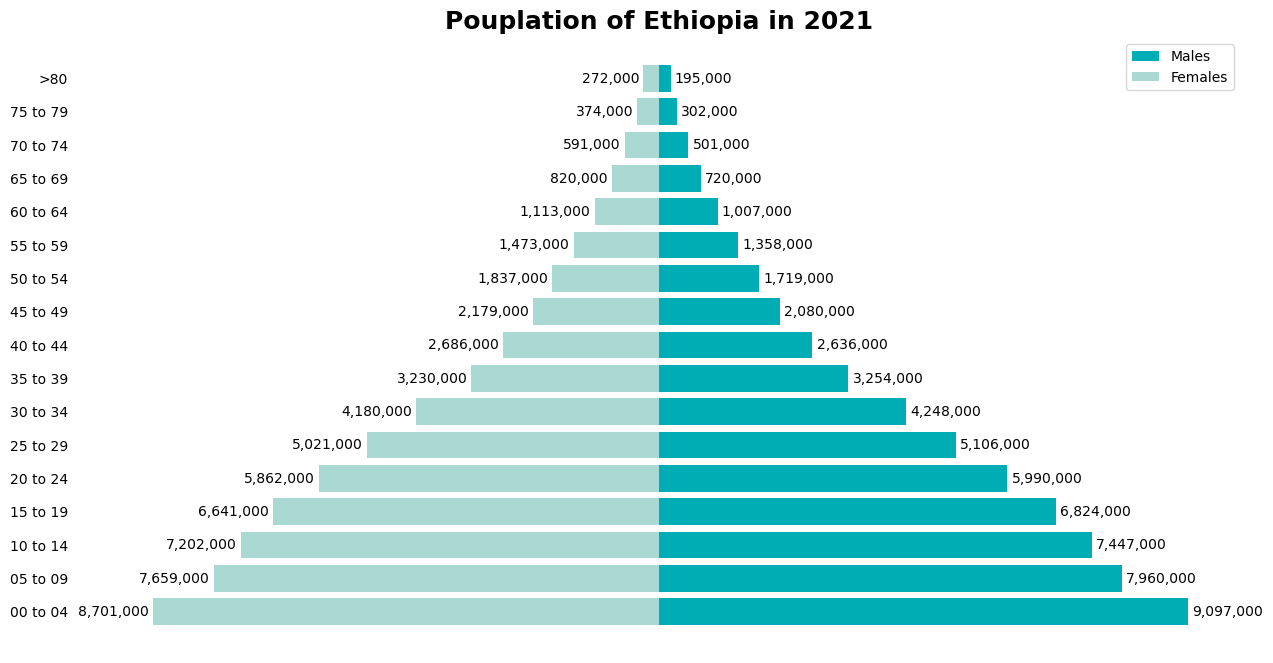

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
df['Female'] = df['Female'] * -1

def animate(year):
    ax.clear()
    filtered = df[df['Year'] == year]
    
    males = plt.barh(y=filtered['Age Range'], width=filtered['Male'], color='#00ADB5')    
    femals = plt.barh(y=filtered['Age Range'], width=filtered['Female'], color='#AAD8D3')

    ax.set_xlim(-10_000_000, 10_000_000)

    ax.bar_label(males, padding=3, labels=[f'{round(value, -3):,}' for value in filtered['Male']])
    ax.bar_label(femals, padding=3, labels=[f'{-1 *round(value, -3):,}' for value in filtered['Female']])

    for edge in ['top', 'right', 'bottom', 'left']:
        ax.spines[edge].set_visible(False)
    ax.tick_params(left=False)
    ax.get_xaxis().set_visible(False)

    ax.legend([males, femals], ['Males', 'Females'])
    ax.set_title(f"Pouplation of Ethiopia in {year}", size=18, weight='bold')

ani = FuncAnimation(fig, animate, frames=range(df['Year'].min(), df['Year'].max()+1), interval=1000)#,interval=20, blit=True)

ani.save('population_pyramid3.mp4', dpi=300, fps=10, writer='ffmpeg', extra_args=['-vcodec', 'libx264'])
# plt.show()
ani.save('Pouplation Pyramid3.gif', dpi=300, writer=PillowWriter(fps=5))
